Research Question:
1. Does the JNUG stock show any noticable patterns?
2. Would you recommend buying the JNUG stock based on this information?

In [108]:
#If stock info is not loading, enter <pip install --upgrade yfinance> into your terminal and restart the notebook

#Import My Dependenices
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mplfinance as mpf
from scipy import stats


In [109]:
#Print last years stock chart for the stock
mystock = 'JNUG'
data2 = yf.download(mystock, period = '1y', interval ='1d')

#Create DataFrame with info
data2_df = pd.DataFrame(data2)

#Display first 5 rows
data2_df.describe()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,JNUG,JNUG,JNUG,JNUG,JNUG
count,251.0000,251.0000,251.0000,251.0000,251.0000
mean,42.4372,43.5196,41.3885,42.5066,"1,051,443.8207"
std,6.2696,6.4649,6.1671,6.3821,"469,950.3281"
min,28.0587,28.5835,27.4966,27.6435,"294,600.0000"
25%,37.8496,38.9275,37.1242,37.9838,"725,750.0000"
50%,42.3340,43.5400,41.3333,42.4038,"910,400.0000"
75%,46.6137,48.2741,45.6104,47.0478,"1,306,600.0000"
max,60.1167,60.6063,59.1276,59.1276,"3,902,000.0000"


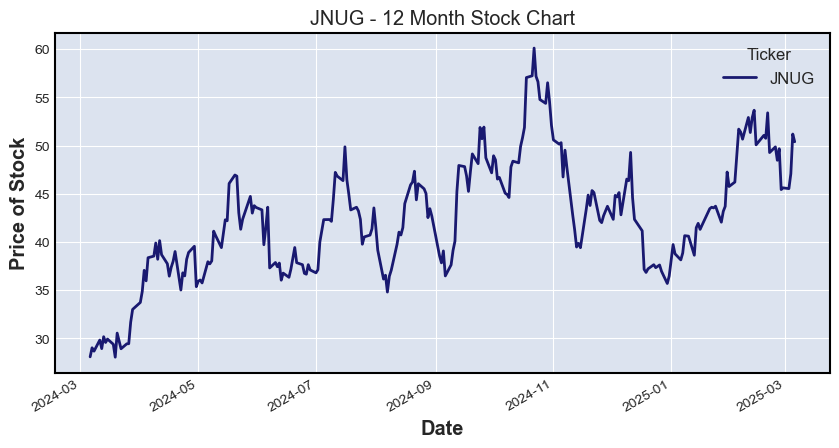

In [110]:
#PLot the daily closing price for the stock from the last year
current_stock = 'JNUG'
y = 'Close'
yr_price_plot = data2_df.plot(y = y, xlabel = 'Date', ylabel = 'Price of Stock', title = f'{current_stock} - 12 Month Stock Chart', 
                             figsize = (10,5), color = 'midnightblue', fontsize = 10);
yr_price_plot;

In [111]:
#Calculate the 20-Day, 50-Day and 100-Day Moving Averages (MA) for the stock, using the 1 year info.

# Per 'ETF.com' - "Leveraged ETFs decay due to the compounding effect of daily returns, volatility of the market and the cost of leverage.
# The volatility drag of leveraged ETFs means that losses in the ETF can be magnified over time and they are not suitable for long-term investments."
# For this reason, it is best to computer our additional analyses using the previous 1-year info, versus the previous 5-year JNUG stock info.

#Moving Averages (MA)
#20-Day
data2_df['20_MA'] = data2_df['Close'].rolling(window=20).mean()
#50-Day
data2_df['50_MA'] = data2_df['Close'].rolling(window=50).mean()
#100-Day
data2_df['100_MA'] = data2_df['Close'].rolling(window=100).mean()

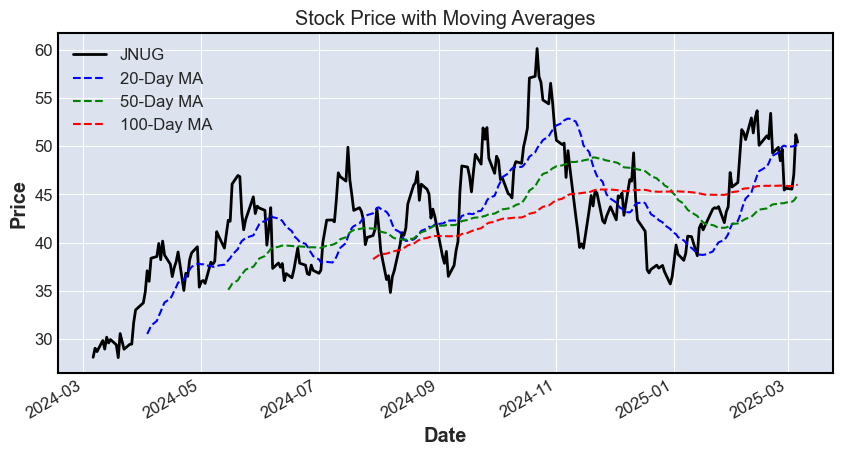

In [112]:
#Plot MA findings

#Stock Closing Price 
ax = data2_df['Close'].plot(color='black', linestyle='-', linewidth=2, label='Close', figsize= [10,5])

#Add MA's to plot
data2_df['20_MA'].plot(ax=ax, color='blue', linestyle='--', linewidth=1.5, label='20-Day MA')
data2_df['50_MA'].plot(ax=ax, color='green', linestyle='--', linewidth=1.5, label='50-Day MA')
data2_df['100_MA'].plot(ax=ax, color='red', linestyle='--', linewidth=1.5, label='100-Day MA')

#Set title, lables and legend
ax.set_title("Stock Price with Moving Averages")
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend()
ax.grid(True)

In [113]:
# Ensure OHLCV columns exist
# candle_data = data2_df[['Open', 'High', 'Low', 'Close', 'Volume']]
# mpf.plot(candle_data,type='candle',mav=(3,6,9))

data3 = yf.download(mystock, period = '30d', interval ='1h')
data3_df = pd.DataFrame(data3)

[*********************100%***********************]  1 of 1 completed


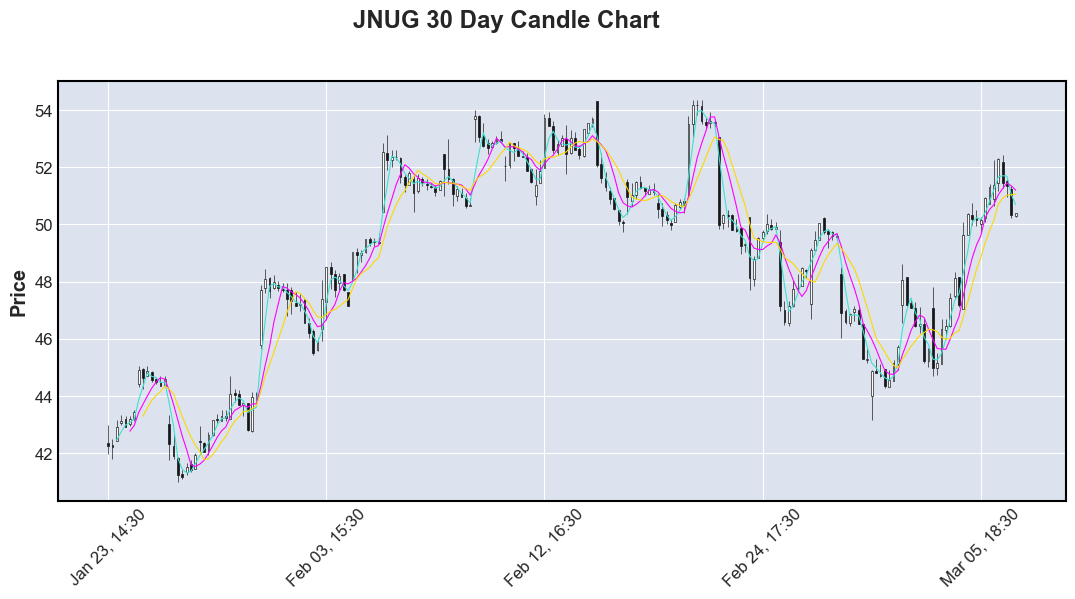

In [114]:
# Drop the 'Ticker' level from the column index
data3_df.columns = data3_df.columns.droplevel(1)  # Remove 'JNUG'

# Now try plotting again
mpf.plot(data3_df, type='candle', mav=(3,6,9), title = 'JNUG 30 Day Candle Chart', figsize = (14,6))

In [115]:
#Volatility Analysis: Calculate and visualize historical volatility for JNUG and SPY.
tickers = ['JNUG', 'SPY', 'GLD']
data_4 = yf.download(tickers, period="2y", interval="1d")
closing_prices = data_4['Close']
closing_prices.head()

[*********************100%***********************]  3 of 3 completed


Ticker,GLD,JNUG,SPY
Date,,,
2023-03-06,171.6200,31.4827,393.3688
2023-03-07,168.6200,28.4472,387.3389
2023-03-08,168.5400,27.8979,387.9711
2023-03-09,170.2000,27.8016,380.8131
2023-03-10,173.8700,28.6207,375.3182


In [116]:
#Calculate daily percent changes for the stock and the S&P 500
def rolling_deviation(closing_prices, stock_column, window=20):
    
    data_copy = closing_prices.copy()
    #first calculate pct change for each row
    pct_change = data_copy[stock_column].pct_change()
    #calulcate rolling deviation
    rolling_dev = pct_change.rolling(window=window).std()
    #create a data frame with the output
    comparison_df = pd.DataFrame({
                                  f'{stock_column} Rolling Dev':rolling_dev})
    comparison_df.dropna(inplace = True)
    #Display the Rolling Deviation rows as decimals
    pd.options.display.float_format = '{:,.4f}'.format 

    return comparison_df

In [117]:
#Run the created function on the stocks you would like to compare:
jnug_rolling_dev = rolling_deviation(closing_prices, 'JNUG', window=10)
spy_rolling_dev = rolling_deviation(closing_prices, 'SPY', window=10)
spy_rolling_dev.head(3)


,SPY Rolling Dev
Date,
2023-03-20,0.0133
2023-03-21,0.0132
2023-03-22,0.0143


In [118]:
#Merge the data frames so we can then plot them
jnug_vs_spy = pd.DataFrame({'JNUG Rolling Dev': jnug_rolling_dev['JNUG Rolling Dev'],
                            'SPY Rolling Dev': spy_rolling_dev['SPY Rolling Dev']})
jnug_vs_spy.head()

,JNUG Rolling Dev,SPY Rolling Dev
Date,,
2023-03-20,0.0676,0.0133
2023-03-21,0.0655,0.0132
2023-03-22,0.0646,0.0143
2023-03-23,0.0638,0.0130
2023-03-24,0.0641,0.0119


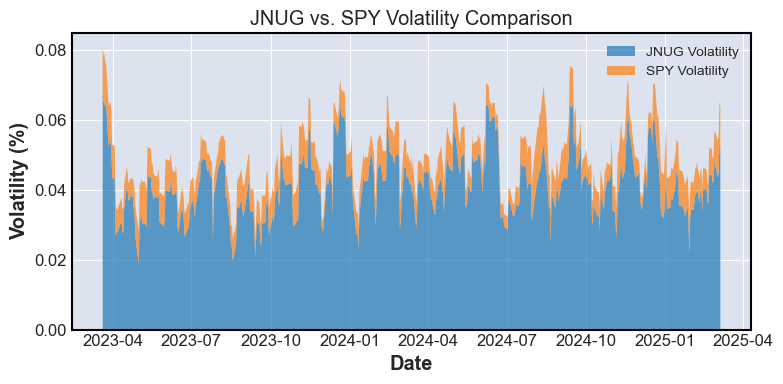

In [119]:
#plot the dataframe:
plt.figure(figsize=(8,4))
plt.stackplot(jnug_vs_spy.index, jnug_vs_spy['JNUG Rolling Dev'], jnug_vs_spy['SPY Rolling Dev'],
              labels=["JNUG Volatility", "SPY Volatility"], alpha = 0.7)
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.title('JNUG vs. SPY Volatility Comparison')
plt.legend(fontsize = 10, loc='upper right')
plt.tight_layout()
plt.show()

In [124]:
#Calculate the following statistical analyses:
jnug_vol = jnug_vs_spy['JNUG Rolling Dev']
spy_vol = jnug_vs_spy['SPY Rolling Dev']

#T=Test and P-Value Function
t_stat, p_value = stats.ttest_ind(jnug_vol, spy_vol, equal_var=False)
#Correlation Coefficient and P-Value
corr_coef, p_value_corr = stats.pearsonr(jnug_vol, spy_vol)

#Print Results
print(f'T-statistic: {t_stat:.4f}')
print(f'P-value for T-statistic: {p_value:.4f}')
print(f'Correlation Coefficient: {corr_coef:.4f}')
print(f'P-value for Correlation: {p_value_corr:.4f}')

T-statistic: 78.8274
P-value for T-statistic: 0.0000
Correlation Coefficient: 0.1619
P-value for Correlation: 0.0003


The t-statistic of 78.82 and a p-value of 0.0000 indicate a highly significant difference in average volatility between JNUG and SPY. This suggests that their volatility levels are not similar, with JNUG likely being much more volatile. The correlation coefficient of 0.1620 shows a weak positive relationship, meaning that while JNUG and SPY volatility sometimes move together, the connection is not strong. This suggests that external factors may occasionally influence both, but their volatility patterns remain largely independent.

In [121]:
#Now compare the stock to GLD, which is an ETF that tracks gold prices.
jnug_rolling_dev = rolling_deviation(closing_prices, 'JNUG', window=10)
gld_rolling_dev = rolling_deviation(closing_prices, 'GLD', window=10)
gld_rolling_dev.head(3)

,GLD Rolling Dev
Date,
2023-03-20,0.0143
2023-03-21,0.0146
2023-03-22,0.0147


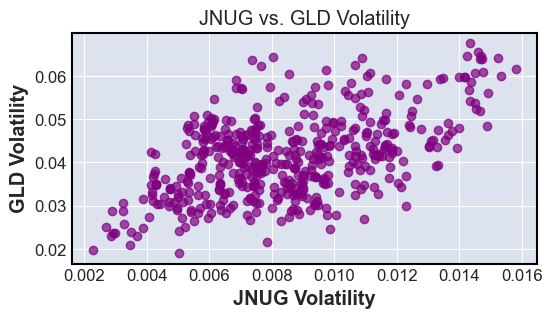

In [122]:

plt.figure(figsize=(6, 3))
plt.scatter(gld_rolling_dev['GLD Rolling Dev'], jnug_rolling_dev['JNUG Rolling Dev'], alpha=0.7, color = 'purple')
plt.xlabel("JNUG Volatility")
plt.ylabel("GLD Volatility")
plt.title("JNUG vs. GLD Volatility")
plt.show()


T-statistic: 75.9293
P-value for T-statistic: 0.0000
Correlation Coefficient: 0.5141
P-value for Correlation: 0.0000


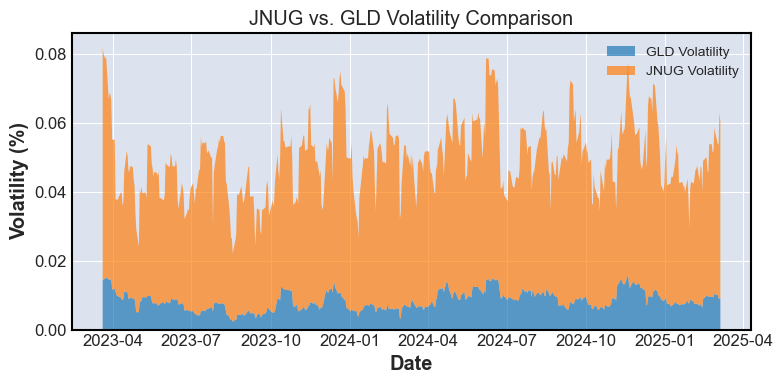

In [125]:
#Calculate the following statistical analyses:
jnug_vol = jnug_vs_spy['JNUG Rolling Dev']
gld_vol = gld_rolling_dev['GLD Rolling Dev']

#T=Test and P-Value Function
t_stat, p_value = stats.ttest_ind(jnug_vol, gld_vol, equal_var=False)
#Correlation Coefficient
corr_coef, p_value_corr = stats.pearsonr(jnug_vol, gld_vol)

#Print Results
print(f'T-statistic: {t_stat:.4f}')
print(f'P-value for T-statistic: {p_value:.4f}')
print(f'Correlation Coefficient: {corr_coef:.4f}')
print(f'P-value for Correlation: {p_value_corr:.4f}')

#plot the dataframe:
plt.figure(figsize=(8,4))
plt.stackplot(jnug_vs_spy.index, gld_rolling_dev['GLD Rolling Dev'], jnug_rolling_dev['JNUG Rolling Dev'],
              labels=["GLD Volatility", "JNUG Volatility"], alpha = 0.7)
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.title('JNUG vs. GLD Volatility Comparison')
plt.legend(fontsize = 10, loc='upper right')
plt.tight_layout()
plt.show()